In [1]:
import numpy as np
import pandas as pd

import matplotlib as matplotlib
import matplotlib.pyplot as plt
import scienceplots

SMALL_SIZE = 16
FONT = {'color':  'black',
        'weight': 'normal',
        'size': SMALL_SIZE
       }

plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.style.use(['science','no-latex'])

In [2]:
# Notebooks paths
BS_DELTA_ZERO = './results/bs_delta_zero.csv'
BS_DELTA_LOW = './results/bs_delta_low.csv'
BS_DELTA_HIGH = './results/bs_delta_high.csv'

WILMOTT_DELTA_ZERO = './results/wilmott_delta_zero.csv'
WILMOTT_DELTA_LOW = './results/wilmott_delta_low.csv'
WILMOTT_DELTA_HIGH = './results/wilmott_delta_high.csv'

TD3_DELTA_ZERO = './results/td3-bs-zero_res.csv'
TD3_DELTA_LOW = './results/td3-bs-low_res.csv'
TD3_DELTA_HIGH = './results/td3-bs-high_res.csv'

In [3]:
df_bs_zero = pd.read_csv(BS_DELTA_ZERO, index_col=0)
df_bs_low = pd.read_csv(BS_DELTA_LOW, index_col=0)
df_bs_high = pd.read_csv(BS_DELTA_HIGH, index_col=0)

df_wilmott_zero = pd.read_csv(WILMOTT_DELTA_ZERO, index_col=0)
df_wilmott_low = pd.read_csv(WILMOTT_DELTA_LOW, index_col=0)
df_wilmott_high = pd.read_csv(WILMOTT_DELTA_HIGH, index_col=0)

df_td3_zero = pd.read_csv(TD3_DELTA_ZERO, index_col=0)
df_td3_low = pd.read_csv(TD3_DELTA_LOW, index_col=0)
df_td3_high = pd.read_csv(TD3_DELTA_HIGH, index_col=0)

In [4]:
# Rename the columns
df_bs_zero = df_bs_zero.rename(columns={'E_PL_T': 'E_PL_T_bs', 'Std_PL_T': 'Std_PL_T_bs'})
df_wilmott_zero = df_wilmott_zero.rename(columns={'E_PL_T': 'E_PL_T_wilmott', 'Std_PL_T': 'Std_PL_T_wilmott'})
df_td3_zero = df_td3_zero.rename(columns={'E_PL_T': 'E_PL_T_td3', 'Std_PL_T': 'Std_PL_T_td3'})

df_bs_low = df_bs_low.rename(columns={'E_PL_T': 'E_PL_T_bs', 'Std_PL_T': 'Std_PL_T_bs'})
df_wilmott_low = df_wilmott_low.rename(columns={'E_PL_T': 'E_PL_T_wilmott', 'Std_PL_T': 'Std_PL_T_wilmott'})
df_td3_low = df_td3_low.rename(columns={'E_PL_T': 'E_PL_T_td3', 'Std_PL_T': 'Std_PL_T_td3'})

df_bs_high = df_bs_high.rename(columns={'E_PL_T': 'E_PL_T_bs', 'Std_PL_T': 'Std_PL_T_bs'})
df_wilmott_high = df_wilmott_high.rename(columns={'E_PL_T': 'E_PL_T_wilmott', 'Std_PL_T': 'Std_PL_T_wilmott'})
df_td3_high = df_td3_high.rename(columns={'E_PL_T': 'E_PL_T_td3', 'Std_PL_T': 'Std_PL_T_td3'})

keys = ['Strike', 'Volatility', 'Maturity', 'Rebalancing_freq']

## Zero transaction resutls

In [5]:
df_zero = pd.merge(df_bs_zero, df_wilmott_zero, how='right', on=keys).merge(df_td3_zero, how='right', on=keys)
df_zero = df_zero.drop(columns=['E_PL_T_wilmott', 'Std_PL_T_wilmott'])
df_zero

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_td3,Std_PL_T_td3
0,100,0.2,1.0,252,0.004872,0.051063,0.028355,0.444859
1,100,0.2,1.0,52,0.005124,0.106017,0.073272,0.458219
2,80,0.2,1.0,252,0.000731,0.014614,0.012899,0.089684
3,80,0.2,1.0,52,-0.001642,0.020561,0.013077,0.092480
4,90,0.2,1.0,252,0.000616,0.024382,-0.018432,0.135620
5,90,0.2,1.0,52,0.008437,0.054875,-0.016749,0.176811
6,110,0.2,1.0,252,0.013363,0.097282,-0.137070,1.285324
7,110,0.2,1.0,52,-0.004795,0.206135,0.185160,1.210820
8,120,0.2,1.0,252,0.013518,0.176213,-0.304213,3.235274
9,120,0.2,1.0,52,0.032036,0.395564,-0.312676,2.945664


### Different strikes, daily rebalancing

In [6]:
df_zero[(df_zero['Rebalancing_freq'] == 252) & (df_zero['Volatility'] == 0.2)]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_td3,Std_PL_T_td3
0,100,0.2,1.0,252,0.004872,0.051063,0.028355,0.444859
2,80,0.2,1.0,252,0.000731,0.014614,0.012899,0.089684
4,90,0.2,1.0,252,0.000616,0.024382,-0.018432,0.135620
6,110,0.2,1.0,252,0.013363,0.097282,-0.137070,1.285324
8,120,0.2,1.0,252,0.013518,0.176213,-0.304213,3.235274


In [7]:
res_1 = df_zero[(df_zero['Rebalancing_freq'] == 252) & (df_zero['Volatility'] == 0.2) & (df_zero['Strike'] == 100)]
res_2 = df_zero[(df_zero['Rebalancing_freq'] == 52) & (df_zero['Volatility'] == 0.2) & (df_zero['Strike'] == 100)]

In [8]:
x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

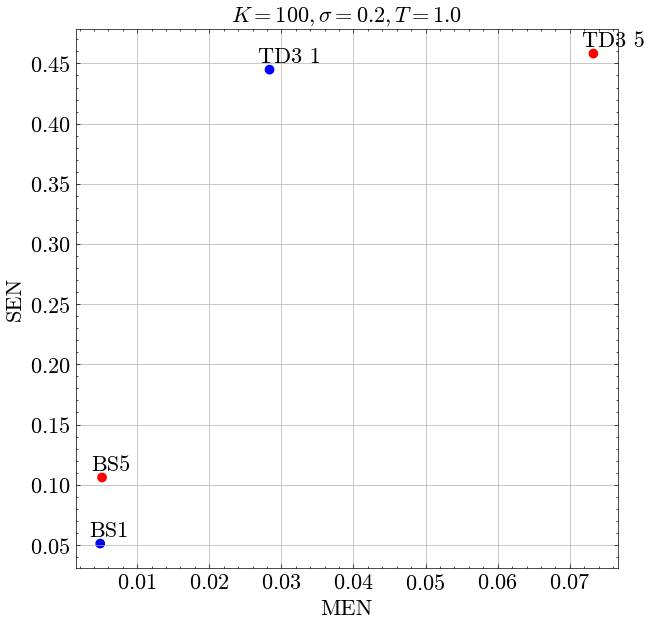

In [9]:
plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'red', 'red'])
text_labels = ['BS1', 'TD3 1', 'BS5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-8, 5), textcoords="offset points", size=SMALL_SIZE)

plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.title(r'$K = 100, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.grid()
plt.show()

### Different strikes, weekly rebalancing

In [10]:
df_zero[(df_zero['Rebalancing_freq'] == 52) & (df_zero['Volatility'] == 0.2)]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_td3,Std_PL_T_td3
1,100,0.2,1.0,52,0.005124,0.106017,0.073272,0.458219
3,80,0.2,1.0,52,-0.001642,0.020561,0.013077,0.092480
5,90,0.2,1.0,52,0.008437,0.054875,-0.016749,0.176811
7,110,0.2,1.0,52,-0.004795,0.206135,0.185160,1.210820
9,120,0.2,1.0,52,0.032036,0.395564,-0.312676,2.945664


### Different volatilities, daily rebalancing

In [11]:
df_zero[(df_zero['Rebalancing_freq'] == 252) & (df_zero['Volatility'] != 0.2)]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_td3,Std_PL_T_td3
10,100,0.1,1.0,252,-0.004162,0.057298,0.018664,0.479501
12,100,0.3,1.0,252,0.006287,0.053737,0.031751,0.362939
14,100,0.4,1.0,252,0.000402,0.054443,0.024315,0.359150


### Different volatilities, weekly rebalancing

In [12]:
df_zero[(df_zero['Rebalancing_freq'] == 52) & (df_zero['Volatility'] != 0.2)]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_td3,Std_PL_T_td3
11,100,0.1,1.0,52,0.030007,0.120005,0.001508,0.457989
13,100,0.3,1.0,52,-0.000375,0.116011,-0.060569,0.362865
15,100,0.4,1.0,52,0.002007,0.117712,-0.031920,0.329331


### Different maturities, daily rebalancing

In [13]:
df_zero[(df_zero['Rebalancing_freq'].isin([504, 121, 50]))]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_td3,Std_PL_T_td3
16,100,0.2,2.0,504,0.005998,0.037629,0.092602,0.447998
18,100,0.2,0.5,121,0.012386,0.078027,-0.022248,0.477612
20,100,0.2,0.2,50,0.016029,0.117439,0.124722,0.449915


### Different maturities, weekly rebalancing

In [14]:
df_zero[(df_zero['Rebalancing_freq'].isin([104, 26, 10]))]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_td3,Std_PL_T_td3
17,100,0.2,2.0,104,-0.009916,0.085893,-0.054461,0.552042
19,100,0.2,0.5,26,0.014782,0.193498,0.047898,0.529128
21,100,0.2,0.2,10,0.058360,0.258304,-0.033232,0.624842


## Low transaction results

In [15]:
df_low = pd.merge(df_bs_low, df_wilmott_low, how='right', on=keys).merge(df_td3_low, how='right', on=keys)
df_low

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
0,100,0.2,1.0,252,-0.617632,0.258913,-0.494779,0.263058,0.165846,0.749428
1,100,0.2,1.0,52,-0.271625,0.161219,-0.114218,0.668894,0.099517,0.732453
2,80,0.2,1.0,252,-0.099966,0.072096,-0.093986,0.064879,0.090757,0.181319
3,80,0.2,1.0,52,-0.040901,0.035402,-0.030095,0.136520,0.057643,0.161313
4,90,0.2,1.0,252,-0.317394,0.133345,-0.260803,0.168427,0.126441,0.281713
5,90,0.2,1.0,52,-0.134857,0.079479,-0.061264,0.278445,0.032836,0.310006
6,110,0.2,1.0,252,-1.076932,0.557806,-0.927918,0.500694,0.268663,2.191919
7,110,0.2,1.0,52,-0.471162,0.309397,-0.130789,1.119580,0.756748,1.524757
8,120,0.2,1.0,252,-1.524328,1.148313,-1.379671,1.419537,0.139938,6.068710
9,120,0.2,1.0,52,-0.718183,0.640199,-0.389655,2.651437,0.413195,4.781828


### Different strikes

#### daily rebalancing

In [16]:
df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Volatility'] == 0.2)]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
0,100,0.2,1.0,252,-0.617632,0.258913,-0.494779,0.263058,0.165846,0.749428
2,80,0.2,1.0,252,-0.099966,0.072096,-0.093986,0.064879,0.090757,0.181319
4,90,0.2,1.0,252,-0.317394,0.133345,-0.260803,0.168427,0.126441,0.281713
6,110,0.2,1.0,252,-1.076932,0.557806,-0.927918,0.500694,0.268663,2.191919
8,120,0.2,1.0,252,-1.524328,1.148313,-1.379671,1.419537,0.139938,6.068710


#### weekly rebalancing

In [17]:
df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Volatility'] == 0.2)]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
1,100,0.2,1.0,52,-0.271625,0.161219,-0.114218,0.668894,0.099517,0.732453
3,80,0.2,1.0,52,-0.040901,0.035402,-0.030095,0.136520,0.057643,0.161313
5,90,0.2,1.0,52,-0.134857,0.079479,-0.061264,0.278445,0.032836,0.310006
7,110,0.2,1.0,52,-0.471162,0.309397,-0.130789,1.119580,0.756748,1.524757
9,120,0.2,1.0,52,-0.718183,0.640199,-0.389655,2.651437,0.413195,4.781828


#### Visualizations

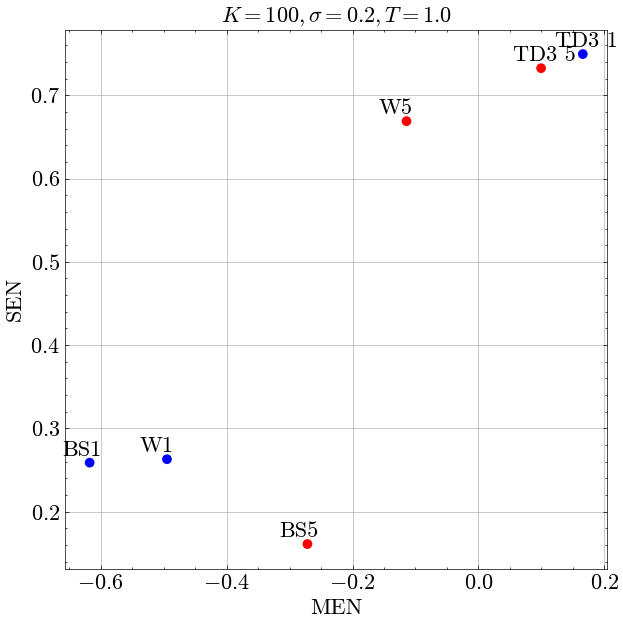

In [18]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 100)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-20, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

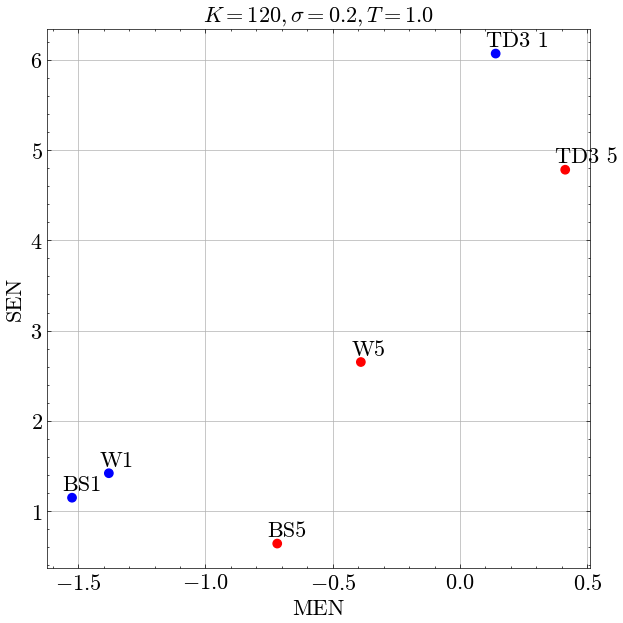

In [19]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 120)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 120)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 120, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

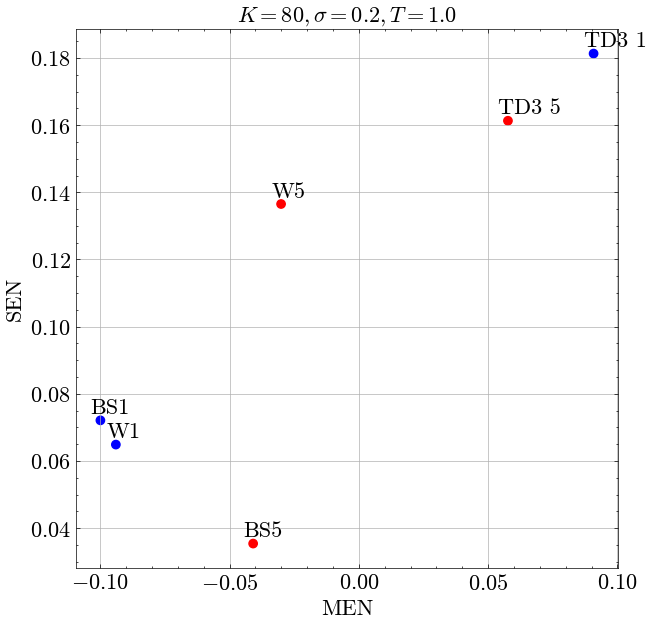

In [20]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 80)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 80)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 80, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

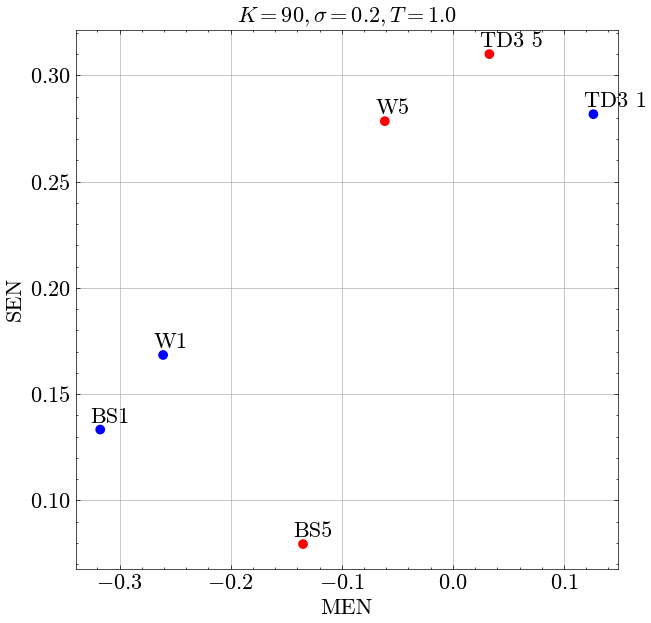

In [21]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 90)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 90)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 90, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

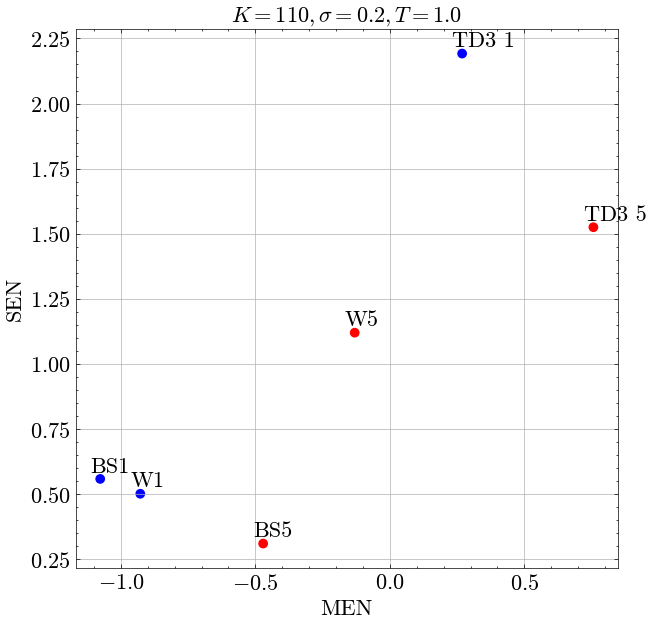

In [22]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 110)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 110)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 110, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

### Different volatilities

#### daily rebalancing

In [23]:
df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Volatility'] != 0.2)]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
10,100,0.1,1.0,252,-1.310209,0.463384,-1.189151,0.493833,0.492511,0.788484
12,100,0.3,1.0,252,-0.403907,0.172415,-0.278491,0.558589,0.296017,0.556225
14,100,0.4,1.0,252,-0.310627,0.122985,-0.182789,0.722203,0.211325,0.596840


#### weekly rebalancing

In [24]:
df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Volatility'] != 0.2)]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
11,100,0.1,1.0,52,-0.561350,0.261862,-0.300800,0.391117,0.248433,0.677436
13,100,0.3,1.0,52,-0.170615,0.133034,0.038371,0.767355,0.050444,0.702178
15,100,0.4,1.0,52,-0.113961,0.134518,-0.015781,0.790565,-0.039474,0.626294


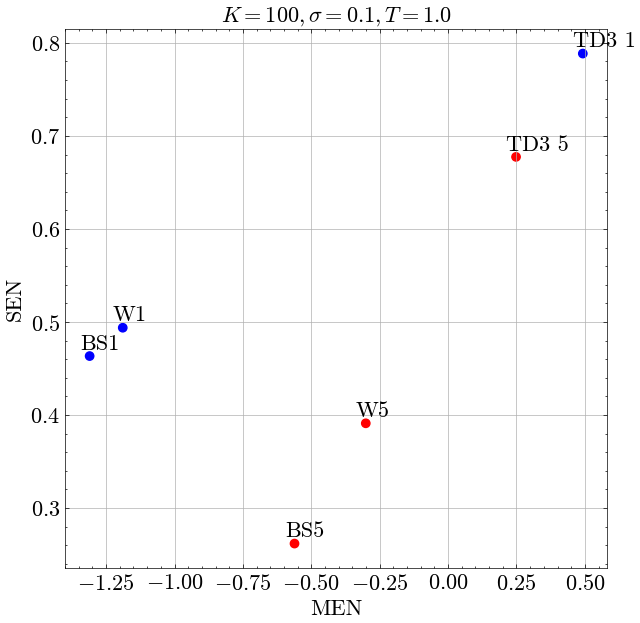

In [25]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Volatility'] == 0.1) & (df_low['Strike'] == 100)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Volatility'] == 0.1) & (df_low['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.1, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

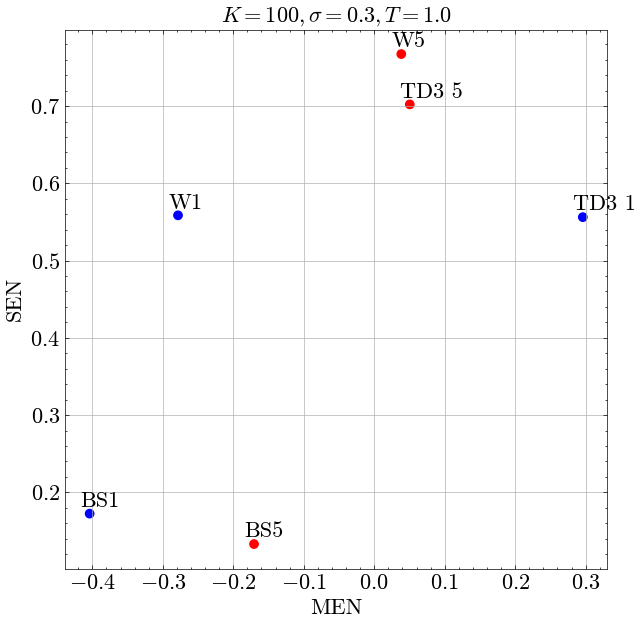

In [26]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Volatility'] == 0.3) & (df_low['Strike'] == 100)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Volatility'] == 0.3) & (df_low['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.3, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

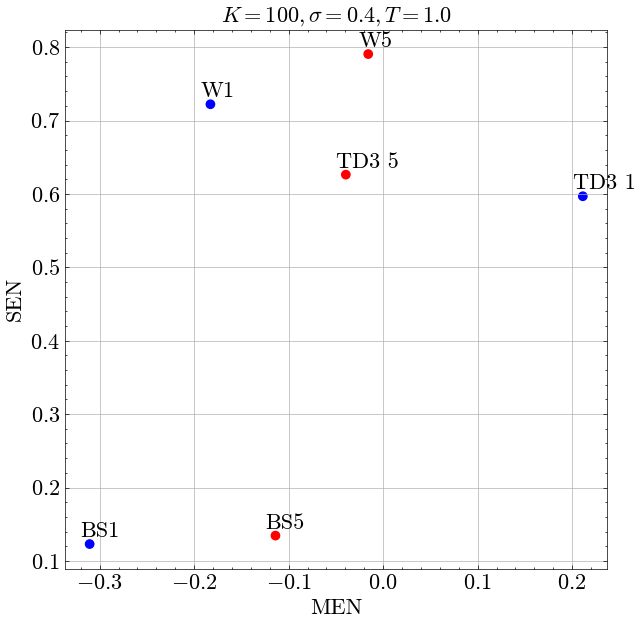

In [27]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Volatility'] == 0.4) & (df_low['Strike'] == 100)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Volatility'] == 0.4) & (df_low['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.4, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

### Different maturities

#### daily rebalancing

In [28]:
df_low[(df_low['Rebalancing_freq'].isin([504, 121, 50]))]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
16,100,0.2,2.0,504,-0.609074,0.255213,-0.525328,0.372037,0.429611,0.579392
18,100,0.2,0.5,121,-0.617245,0.225774,-0.504427,0.457158,0.128094,0.927855
20,100,0.2,0.2,50,-0.643196,0.271016,-0.361152,0.369329,0.285235,0.956450


#### weekly rebalancing

In [29]:
df_low[(df_low['Rebalancing_freq'].isin([104, 26, 10]))]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
17,100,0.2,2.0,104,-0.275566,0.128932,-0.048317,0.647440,0.068634,0.630368
19,100,0.2,0.5,26,-0.262446,0.188253,-0.013231,0.655518,0.083446,0.787131
21,100,0.2,0.2,10,-0.254707,0.299575,0.006294,0.633387,0.248786,0.713144


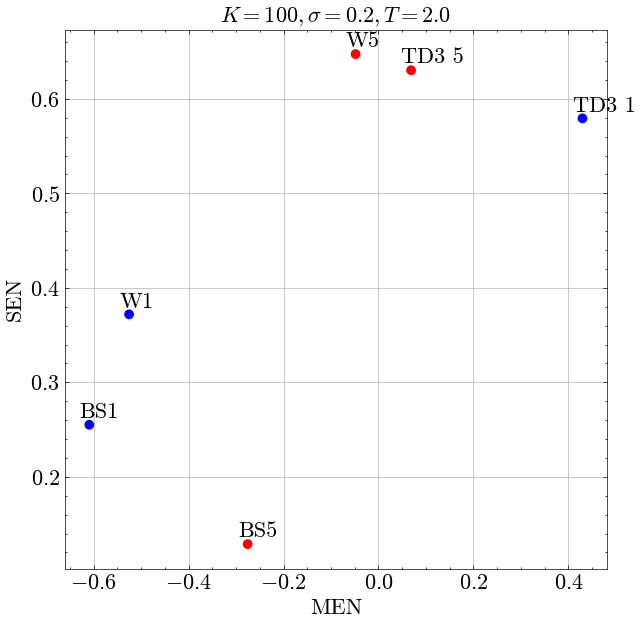

In [30]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 504) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 100)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 104) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 2.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

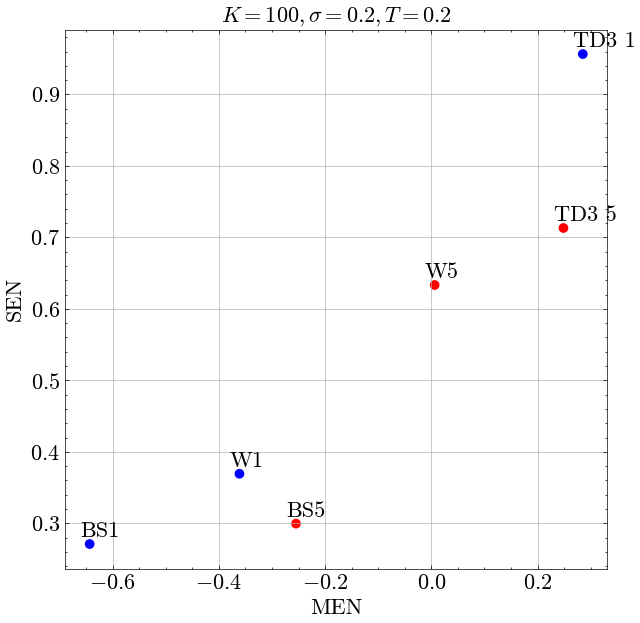

In [31]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 50) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 100)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 10) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 0.2$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN',  fontdict=FONT)
plt.grid()
plt.show()

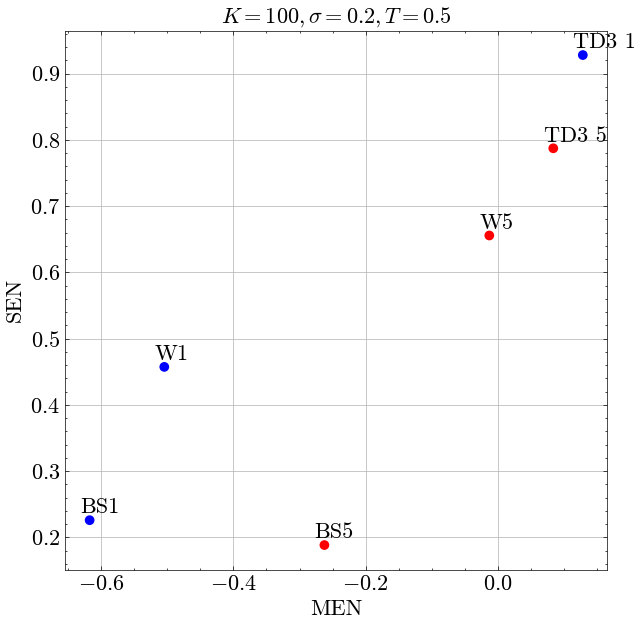

In [32]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 121) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 100)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 26) & (df_low['Volatility'] == 0.2) & (df_low['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 0.5$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

## High transaction resutls

In [33]:
df_high = pd.merge(df_bs_high, df_wilmott_high, how='right', on=keys).merge(df_td3_high, how='right', on=keys)
df_high

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
0,100,0.2,1.0,252,-3.179776,1.107326,-3.201862,1.251742,1.696863,0.765794
1,100,0.2,1.0,52,-1.281686,0.490345,-0.999273,0.532805,0.864241,0.647094
2,80,0.2,1.0,252,-0.513890,0.367200,-0.572396,0.382615,0.266314,0.118841
3,80,0.2,1.0,52,-0.226612,0.167000,-0.224317,0.145728,0.105470,0.089601
4,90,0.2,1.0,252,-1.542040,0.661163,-1.608369,0.685119,0.670254,0.262217
5,90,0.2,1.0,52,-0.698181,0.280408,-0.528852,0.251133,0.299984,0.211625
6,110,0.2,1.0,252,-5.548541,2.920519,-5.507856,2.698322,4.291693,2.295564
7,110,0.2,1.0,52,-2.432443,1.152548,-1.679675,1.062955,2.094416,1.686929
8,120,0.2,1.0,252,-8.628951,5.638791,-7.931971,5.358684,9.672870,6.603595
9,120,0.2,1.0,52,-3.908757,2.705555,-2.522668,1.986643,5.832255,5.080264


### Different strikes

#### daily rebalancing

In [34]:
df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Volatility'] == 0.2)]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
0,100,0.2,1.0,252,-3.179776,1.107326,-3.201862,1.251742,1.696863,0.765794
2,80,0.2,1.0,252,-0.513890,0.367200,-0.572396,0.382615,0.266314,0.118841
4,90,0.2,1.0,252,-1.542040,0.661163,-1.608369,0.685119,0.670254,0.262217
6,110,0.2,1.0,252,-5.548541,2.920519,-5.507856,2.698322,4.291693,2.295564
8,120,0.2,1.0,252,-8.628951,5.638791,-7.931971,5.358684,9.672870,6.603595


#### weekly rebalancing

In [35]:
df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Volatility'] == 0.2)]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
1,100,0.2,1.0,52,-1.281686,0.490345,-0.999273,0.532805,0.864241,0.647094
3,80,0.2,1.0,52,-0.226612,0.167000,-0.224317,0.145728,0.105470,0.089601
5,90,0.2,1.0,52,-0.698181,0.280408,-0.528852,0.251133,0.299984,0.211625
7,110,0.2,1.0,52,-2.432443,1.152548,-1.679675,1.062955,2.094416,1.686929
9,120,0.2,1.0,52,-3.908757,2.705555,-2.522668,1.986643,5.832255,5.080264


#### Visualizations

In [36]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 100)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 100)]

In [37]:
x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

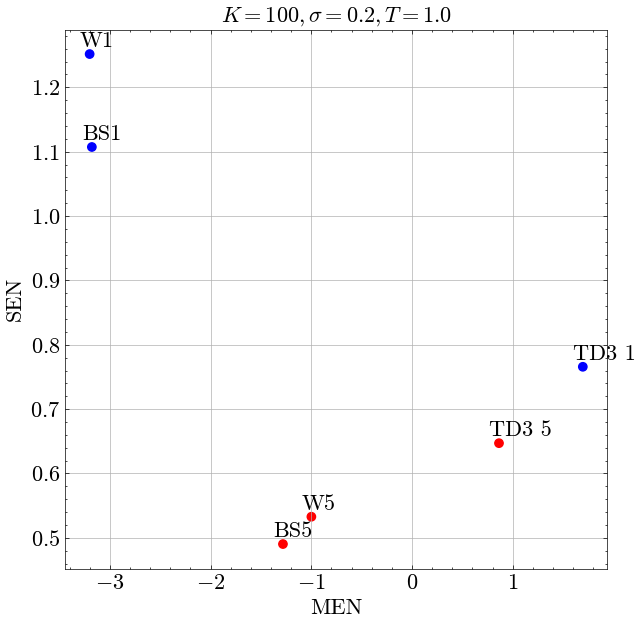

In [38]:
plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

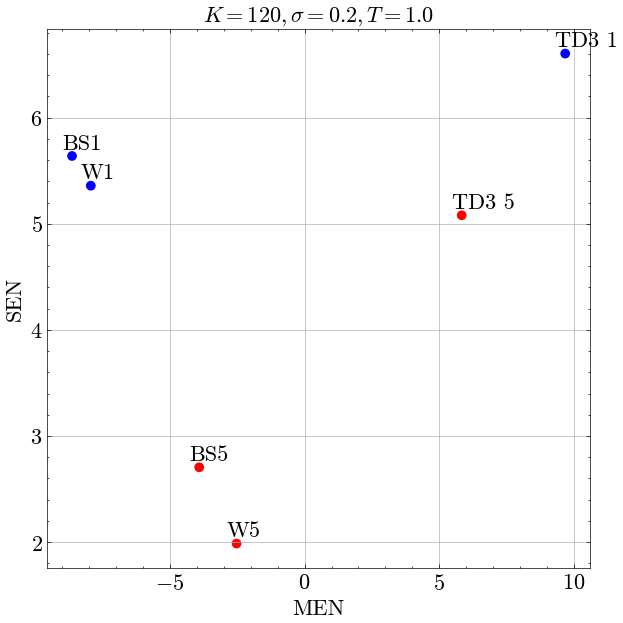

In [39]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 120)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 120)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 120, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

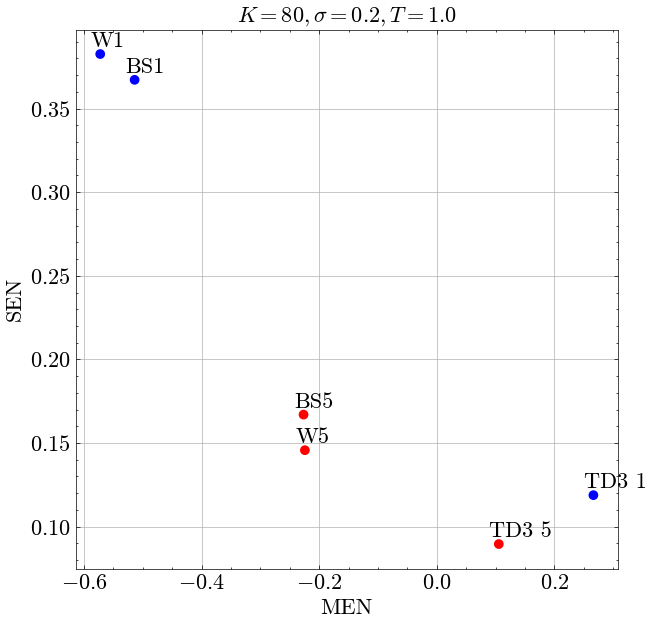

In [40]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 80)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 80)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 80, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

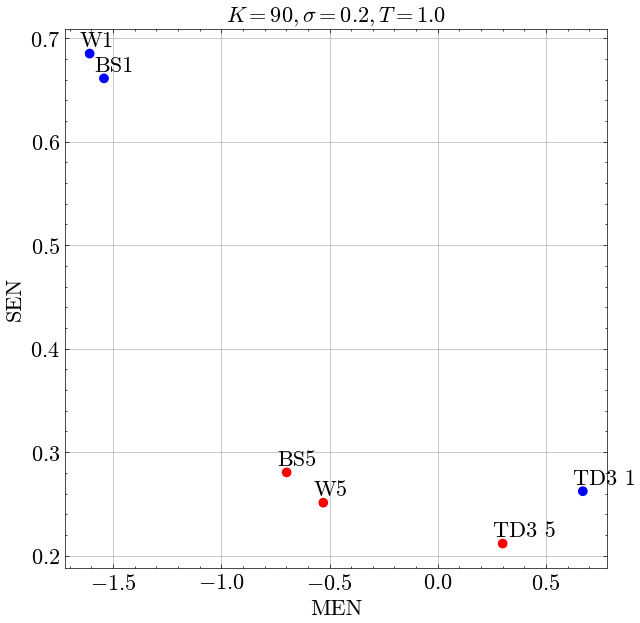

In [41]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 90)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 90)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 90, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

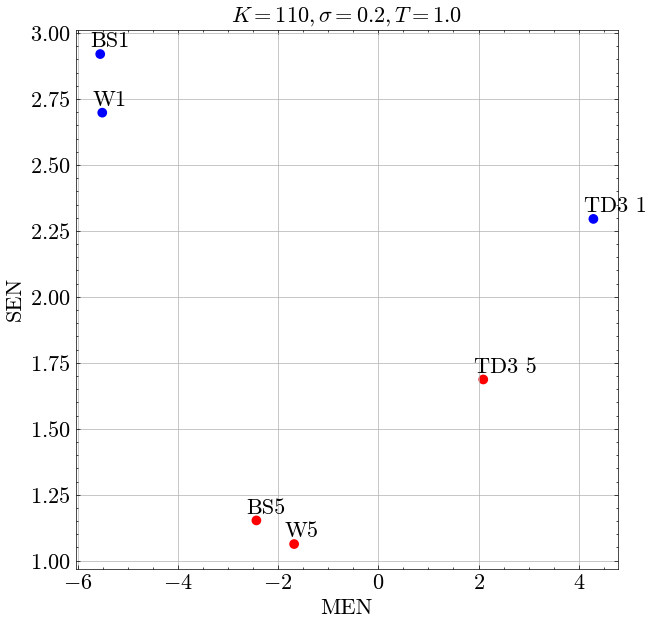

In [42]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 110)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 110)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 110, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

### Different volatilities

#### daily rebalancing

In [43]:
df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Volatility'] != 0.2)]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
10,100,0.1,1.0,252,-6.244052,2.221014,-6.404046,2.122349,3.107585,0.903637
12,100,0.3,1.0,252,-2.023858,0.719476,-2.092943,0.705339,1.427431,0.577799
14,100,0.4,1.0,252,-1.520854,0.606139,-1.420447,0.498862,0.914120,0.646855


#### weekly rebalancing

In [44]:
df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Volatility'] != 0.2)]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
11,100,0.1,1.0,52,-2.740028,0.913328,-2.577313,0.900344,1.320448,0.883725
13,100,0.3,1.0,52,-0.859556,0.345447,-0.346787,0.443058,0.691861,0.562149
15,100,0.4,1.0,52,-0.701880,0.281909,-0.202671,0.548996,0.481034,0.550701


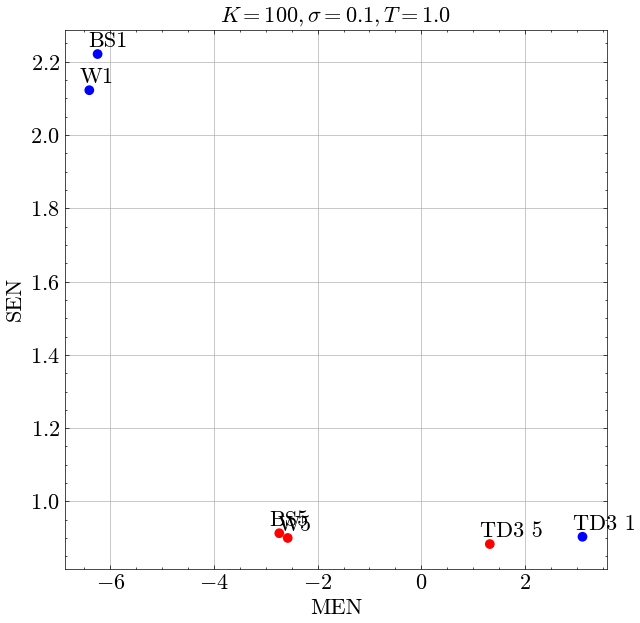

In [45]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Volatility'] == 0.1) & (df_high['Strike'] == 100)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Volatility'] == 0.1) & (df_high['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.1, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

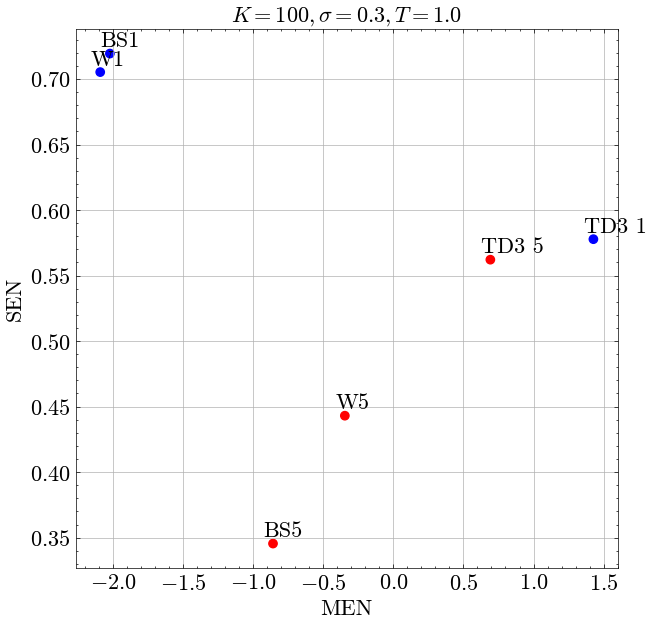

In [46]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Volatility'] == 0.3) & (df_high['Strike'] == 100)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Volatility'] == 0.3) & (df_high['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.3, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

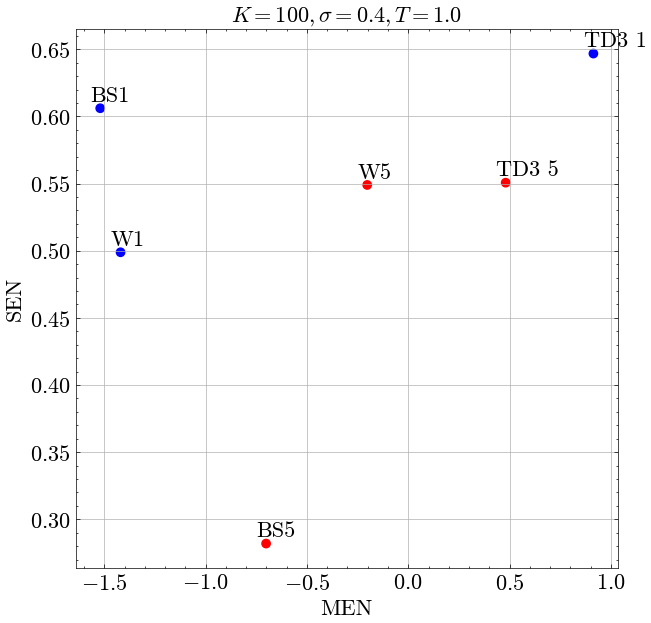

In [47]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Volatility'] == 0.4) & (df_high['Strike'] == 100)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Volatility'] == 0.4) & (df_high['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.4, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

### Different maturities

#### daily rebalancing

In [48]:
df_high[(df_high['Rebalancing_freq'].isin([504, 121, 50]))]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
16,100,0.2,2.0,504,-3.251773,1.232440,-3.190116,1.196275,2.019728,0.836070
18,100,0.2,0.5,121,-3.126790,1.075376,-2.722059,1.117226,1.674434,0.909251
20,100,0.2,0.2,50,-3.212788,1.099713,-3.201199,0.930251,2.029560,0.842430


#### weekly rebalancing

In [49]:
df_high[(df_high['Rebalancing_freq'].isin([104, 26, 10]))]

,Strike,Volatility,Maturity,Rebalancing_freq,E_PL_T_bs,Std_PL_T_bs,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
17,100,0.2,2.0,104,-1.384359,0.527870,-1.012320,0.434218,0.873667,0.542169
19,100,0.2,0.5,26,-1.342410,0.470356,-0.846998,0.427003,0.812656,0.782751
21,100,0.2,0.2,10,-1.135463,0.523035,-0.602196,0.528863,0.842800,0.907893


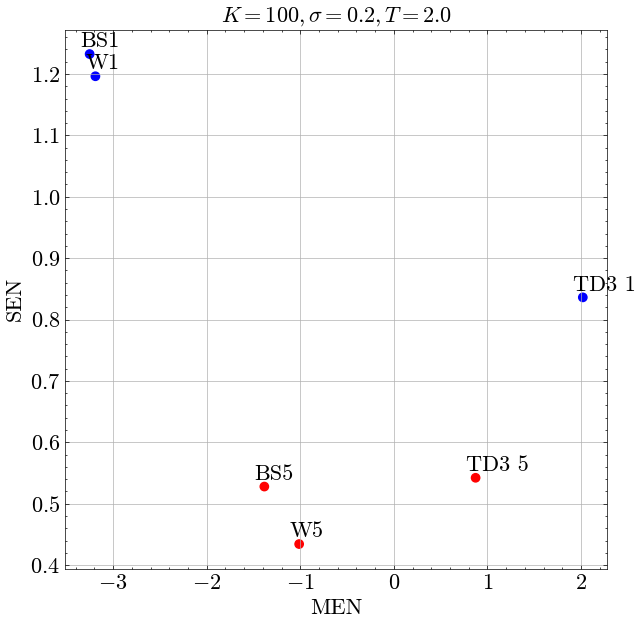

In [50]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 504) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 100)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 104) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 2.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

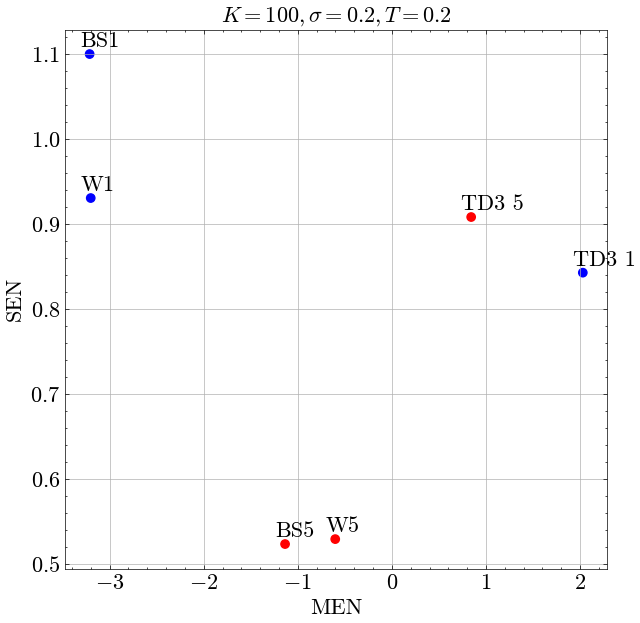

In [51]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 50) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 100)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 10) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 0.2$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

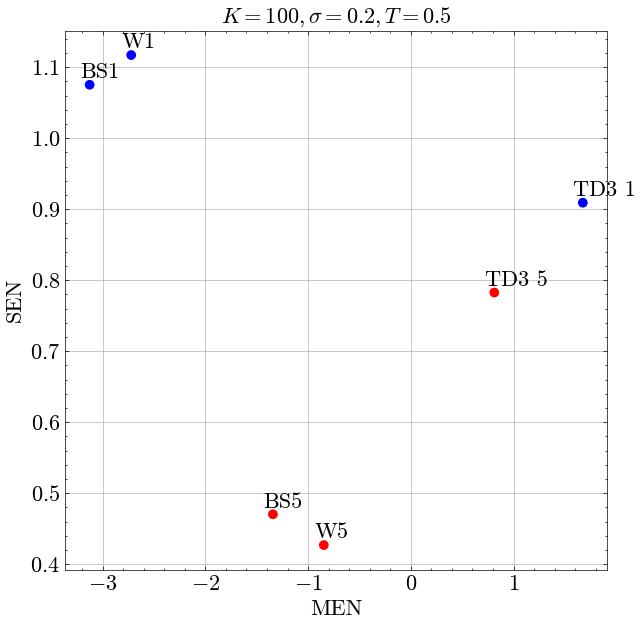

In [52]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 121) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 100)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 26) & (df_high['Volatility'] == 0.2) & (df_high['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['BS1', 'W1', 'TD3 1', 'BS5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 0.5$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()